In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from ydata_profiling import ProfileReport
beer1=pd.read_csv('../data/raw/recipeData.csv')

In [2]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 175)
pd.set_option('display.max_colwidth', 300)
beer1.head() #color=SRM

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumking-clone,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-extract,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-all-grain,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgisk-blonde-50-l,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


Size(L)
Amount brewed for recipe listed

OG
Specific gravity of wort before fermentation

FG
Specific gravity of wort after fermentation

ABV
Alcohol By Volume

IBU
International Bittering Units

(Notes: drop columns: size, url, og, boilsize, boilgravity,efficiency, mashthickness, pitchrate,primarytemp,priming amount,userID (MAYBE: fg,boiltime,primingmethod)
Assign ID to Brewmethod, SugarScale, check Style ID)
drop rows where style is NaN,
DIVIDE NEW_STYLES INTO 10, don't remove old styles so that they're available in the recommendator

In [3]:
beer1.groupby('Style')[['ABV',	'IBU',	'Color']].mean()

,ABV,IBU,Color
Style,,,
Altbier,5.104161,39.141460,13.985839
Alternative Grain Beer,5.419722,34.696389,8.760000
Alternative Sugar Beer,7.858571,26.974286,11.769048
American Amber Ale,5.674657,39.496565,14.167954
American Barleywine,10.599971,92.876628,16.988094
American Brown Ale,5.820972,36.062873,23.600981
American IPA,6.444294,71.940095,8.413044
American Lager,5.222636,23.772000,5.049318
American Light Lager,5.648292,30.743439,10.191577


In [2]:
beer1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         73861 non-null  int64  
 1   Name           73859 non-null  object 
 2   URL            73861 non-null  object 
 3   Style          73265 non-null  object 
 4   StyleID        73861 non-null  int64  
 5   Size(L)        73861 non-null  float64
 6   OG             73861 non-null  float64
 7   FG             73861 non-null  float64
 8   ABV            73861 non-null  float64
 9   IBU            73861 non-null  float64
 10  Color          73861 non-null  float64
 11  BoilSize       73861 non-null  float64
 12  BoilTime       73861 non-null  int64  
 13  BoilGravity    70871 non-null  float64
 14  Efficiency     73861 non-null  float64
 15  MashThickness  43997 non-null  float64
 16  SugarScale     73861 non-null  object 
 17  BrewMethod     73861 non-null  object 
 18  PitchR

In [7]:
beer1.describe(include='all')

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
count,73861.000000,73859,73861,73265,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,70871.000000,73861.000000,43997.000000,73861,73861,34609.000000,51199.000000,6760,4774,23371.000000
unique,NaN,59147,73861,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN,NaN,873,1896,NaN
top,NaN,Awesome Recipe,/homebrew/recipe/view/1633/vanilla-cream-ale,American IPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Specific Gravity,All Grain,NaN,NaN,Corn Sugar,5 oz,NaN
freq,NaN,1311,1,11940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71959,49692,NaN,NaN,715,205,NaN
mean,36931.000000,NaN,NaN,NaN,60.179432,43.929775,1.406266,1.075865,6.136865,44.276186,13.404989,49.724919,65.074870,1.353955,66.354881,2.127235,NaN,NaN,0.750468,19.175641,NaN,NaN,43078.069188
std,21321.978453,NaN,NaN,NaN,56.811462,180.373492,2.196908,0.432524,1.883510,42.945508,11.944511,193.246427,15.024228,1.930989,14.091686,1.682347,NaN,NaN,0.394262,4.219676,NaN,NaN,27734.252556
min,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,-0.003000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,-17.780000,NaN,NaN,49.000000
25%,18466.000000,NaN,NaN,NaN,10.000000,18.930000,1.051000,1.011000,5.080000,23.370000,5.170000,20.820000,60.000000,1.040000,65.000000,1.500000,NaN,NaN,0.350000,18.000000,NaN,NaN,20984.000000
50%,36931.000000,NaN,NaN,NaN,35.000000,20.820000,1.058000,1.013000,5.790000,35.770000,8.440000,27.440000,60.000000,1.047000,70.000000,1.500000,NaN,NaN,0.750000,20.000000,NaN,NaN,42897.000000
75%,55396.000000,NaN,NaN,NaN,111.000000,23.660000,1.069000,1.017000,6.830000,56.380000,16.790000,30.000000,60.000000,1.060000,75.000000,3.000000,NaN,NaN,1.000000,20.000000,NaN,NaN,57841.000000


In [5]:
beer1.columns

Index(['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG',
       'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity',
       'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate',
       'PrimaryTemp', 'PrimingMethod', 'PrimingAmount', 'UserId'],
      dtype='object')

<Axes: >

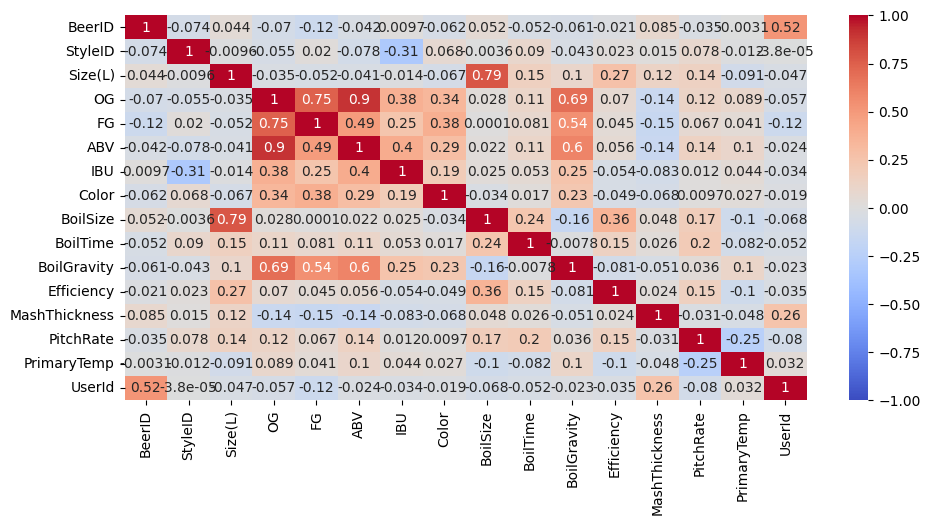

In [8]:
plt.figure(figsize=(11,5))
sns.heatmap(beer1.corr(method='spearman',numeric_only=True),cmap='coolwarm',annot=True,vmin=-1)

In [ ]:
# profilereport=ProfileReport(beer1)
# profilereport.to_file(output_file='report.html')

In [15]:
#Setting color limit according to SRM values
# beer1['Color'][beer1['Color']>79]=80

C:\Users\Agui\AppData\Local\Temp\ipykernel_10840\4042634573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beer1['Color'][beer1['Color']>79]=80


In [3]:
beer1['BrewMethod'].nunique()
# beer1['SugarScale'].nunique()
# # beer1['Efficiency'].nunique() #drop
# beer1['PrimingMethod'].nunique() #873, drop? (sugar, carbonation, other...)
# beer1['BoilTime'].unique() #divide into 3? value_counts()
# beer1['FG'].nunique()

# profilereport=ProfileReport(beer1)
# profilereport.to_file(output_file='report.html')

4

In [4]:
#DELETING USELESS COLUMNS
beer1=beer1.drop(columns=(['BeerID','Size(L)', 'URL', 'OG', 'BoilSize', 'BoilGravity','Efficiency', 'MashThickness', 'PitchRate','PrimaryTemp','PrimingAmount','UserId']))

In [6]:
#Storing  nan styles in a different DF and removing them from the original df
beerNan=beer1[beer1['Style'].isnull()] # just in case
beer1.dropna(subset=['Style','Name'],axis=0,inplace=True)

In [9]:
beer1[beer1['Style'].isnull()]

,Name,Style,StyleID,FG,ABV,IBU,Color,BoilTime,SugarScale,BrewMethod,PrimingMethod


In [29]:
beer1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73265 entries, 0 to 73860
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           73263 non-null  object 
 1   Style          73265 non-null  object 
 2   StyleID        73265 non-null  int64  
 3   FG             73265 non-null  float64
 4   ABV            73265 non-null  float64
 5   IBU            73265 non-null  float64
 6   Color          73265 non-null  float64
 7   BoilTime       73265 non-null  int64  
 8   SugarScale     73265 non-null  object 
 9   BrewMethod     73265 non-null  object 
 10  PrimingMethod  6738 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 6.7+ MB


In [14]:
beer1.groupby('Style')[['ABV','IBU','Color']].mean().reset_index().sort_values(by='Style')

,Style,ABV,IBU,Color
0,Altbier,5.104161,39.141460,13.985839
1,Alternative Grain Beer,5.419722,34.696389,8.760000
2,Alternative Sugar Beer,7.858571,26.974286,11.769048
3,American Amber Ale,5.674657,39.496565,14.167954
4,American Barleywine,10.599971,92.876628,16.988094
5,American Brown Ale,5.820972,36.062873,23.600981
6,American IPA,6.444294,71.940095,8.413044
7,American Lager,5.222636,23.772000,5.049318
8,American Light Lager,5.648292,30.743439,10.191577
9,American Pale Ale,5.463429,43.659169,7.206281


In [15]:
beer1[(beer1['Style'].str.contains('Amber Ale'))]

,Name,Style,StyleID,FG,ABV,IBU,Color,BoilTime,SugarScale,BrewMethod,PrimingMethod
48,Nugget Nectar Clone,American Amber Ale,4,1.009,7.50,0.00,8.48,90,Specific Gravity,All Grain,NaN
59,Red Trolley Clone,American Amber Ale,4,1.016,5.71,17.56,29.60,60,Specific Gravity,All Grain,corn sugar
103,White House Honey Ale (Official Recipe),American Amber Ale,4,1.017,5.63,27.73,8.87,50,Specific Gravity,extract,Dextrose
149,Jeremy Corbeeryn (Hoppy Red Ale),American Amber Ale,4,1.012,5.82,44.62,18.72,30,Specific Gravity,BIAB,NaN
152,Bakke Brygg American Red Ale 25 L,American Amber Ale,4,1.015,6.61,65.02,16.19,90,Specific Gravity,All Grain,Sukkerlake
...,...,...,...,...,...,...,...,...,...,...,...
73737,Knobby Tire,American Amber Ale,4,1.017,6.38,28.23,13.21,60,Specific Gravity,All Grain,NaN
73741,Average Ed,American Amber Ale,4,1.009,5.27,22.16,9.88,60,Specific Gravity,All Grain,Force Carb
73745,Fuggles IPA,American Amber Ale,4,1.014,6.23,33.56,8.44,60,Specific Gravity,All Grain,NaN
73756,Awesome Recipe,American Amber Ale,4,1.024,10.14,30.57,7.78,90,Specific Gravity,All Grain,NaN


In [49]:
#TYPES OF ALES TO SORT
beer1['Style'][(beer1['Style'].str.contains('Ale'))].value_counts()

Style
American Pale Ale               7581
American Amber Ale              2038
Blonde Ale                      1753
Irish Red Ale                   1204
American Brown Ale              1152
Cream Ale                        830
Belgian Pale Ale                 625
Belgian Dark Strong Ale          538
Belgian Blond Ale                496
Belgian Specialty Ale            422
British Brown Ale                390
Belgian Golden Strong Ale        354
Old Ale                          300
British Golden Ale               271
Strong Scotch Ale                230
American Strong Ale              227
British Strong Ale               195
Flanders Red Ale                 145
Flanders Brown Ale/Oud Bruin      51
Australian Sparkling Ale          49
London Brown Ale                   8
Name: count, dtype: int64

In [44]:
beer1['Style'].unique()

array(['Cream Ale', 'Holiday/Winter Special Spiced Beer', 'American IPA',
       'Belgian Blond Ale', 'American Pale Ale', 'Imperial IPA',
       'Robust Porter', 'Bohemian Pilsener', 'Saison',
       'Northern English Brown', 'English IPA', 'Traditional Bock',
       'Premium American Lager', 'Belgian Golden Strong Ale',
       'Double IPA', 'Blonde Ale', 'Light American Lager',
       'German Pilsner (Pils)', 'American Brown Ale', 'Oatmeal Stout',
       'Specialty Beer', 'American Amber Ale', 'Kölsch', 'Witbier',
       'Weizen/Weissbier', 'Trappist Single', 'Russian Imperial Stout',
       'Specialty IPA: Black IPA', 'Sweet Stout', 'Strong Scotch Ale',
       'Belgian Tripel', 'American Stout', 'Belgian Pale Ale',
       'Dark American Lager', 'Dry Stout', 'Belgian Dark Strong Ale',
       'American Wheat or Rye Beer', 'Vienna Lager',
       'Special/Best/Premium Bitter', 'Experimental Beer',
       'Irish Red Ale', 'Old Ale', 'Extra Special/Strong Bitter (ESB)',
       'Winter Sea

In [22]:
#keys are wrong, values are the correct ones
# beer1['combined_info'] = beer1['Name'] + ' ' + beer1['Style']

longstyle_map={'Blonde Ale':'Pale Lager/Blonde Ale', 'British Golden Ale':'Pale Lager/Blonde Ale','Cream Ale':'Pale Lager/Blonde Ale','Holiday/Winter Special Spiced Beer':'Other','American IPA':'Pale Ale', 'Belgian Blond Ale':'Pale Lager/Blonde Ale',
               'American Pale Ale':'Pale Ale','Imperial IPA':'Pale Ale','Robust Porter':'Stout/Porter','Bohemian Pilsener':'Pale Lager/Blonde Ale','Saison':'Pale Ale',
               'Northern English Brown':'Brown Ale','English IPA':'Pale Ale','Traditional Bock':'Other','Premium American Lager':'Pale Lager/Blonde Ale',
               'Double IPA':'Pale Ale','Belgian Golden Strong Ale':'Strong Ale','Double IPA':'Pale Ale','Light American Lager':'Pale Lager/Blonde Ale',
               'German Pilsner (Pils)':'Pale Lager/Blonde Ale','American Brown Ale':'Brown Ale','Oatmeal Stout':'Stout/Porter', 'Specialty Beer':'Other',
               'American Amber Ale':'Pale Ale','Kölsch':'Pale Lager/Blonde Ale', 'Witbier':'Wheat','Weizen/Weissbier':'Wheat','Trappist Single':'Other',
               'Russian Imperial Stout':'Stout/Porter','Specialty IPA: Black IPA':'Other', 'Sweet Stout':'Stout/Porter', 'Strong Scotch Ale':'Strong Ale',
               'Belgian Tripel':'Pale Ale','American Stout':'Stout/Porter','Belgian Pale Ale':'Pale Ale','Dark American Lager':'Other', 'Dry Stout':'Stout/Porter',
               'Belgian Dark Strong Ale':'Strong Ale','American Wheat or Rye Beer':'Wheat','Vienna Lager':'Pale Lager/Blonde Ale','Special/Best/Premium Bitter':'Other',
               'Experimental Beer':'Other','Irish Red Ale':'Pale Ale', 'Old Ale':'Other','Altbier':'Other','Extra Special/Strong Bitter (ESB)':'Pale Ale',
               'Winter Seasonal Beer':'Other','Standard American Lager':'Pale Lager/Blonde Ale', 'Wood-Aged Beer':'Other','Fruit Beer':'Other', 'Golden Ale':'Pale Ale',
               'Flanders Red Ale':'Pale Ale','Berliner Weisse':'Wheat','Oktoberfest/Märzen':'Pale Lager/Blonde Ale','Munich Helles':'Pale Lager/Blonde Ale',
               'Classic American Pilsner':'Pale Lager/Blonde Ale','Gueuze':'Other','Brown Porter':'Stout/Porter','American Light Lager':'Pale Lager/Blonde Ale', 'English Cider':'Other',
               'Fruit Cider':'Other','Spice  Herb  or Vegetable Beer':'Other','Southern English Brown':'Brown Ale','Other Smoked Beer':'Other',
               'Belgian Dubbel':'Strong Ale','Cyser (Apple Melomel)':'Other','Metheglin':'Other','Specialty IPA: Red IPA':'Other', 'Belgian Specialty Ale':'Other',
               'Foreign Extra Stout':'Stout/Porter','Braggot':'Other','Weizenbock':'Other', 'International Pale Lager':'Pale Lager/Blonde Ale','Common Cider':'Other',
               'Imperial Stout':'Stout/Porter', 'Strong Bitter':'Pale Ale','Dusseldorf Altbier':'Other','Bière de Garde':'Other','Dunkelweizen':'Other',
               'Schwarzbier':'Stout/Porter','Baltic Porter':'Stout/Porter','Doppelbock':'Other','American Barleywine':'Strong Ale','Other Specialty Cider or Perry':'Other',
               'Specialty IPA: White IPA':'Other','Mild':'Other','California Common Beer':'Other','American Wheat Beer':'Wheat','British Strong Ale':'Strong Ale',
               'Other Fruit Melomel':'Other','Classic Rauchbier':'Other','Märzen':'Pale Lager/Blonde Ale','American Lager':'Pale Lager/Blonde Ale','Wee Heavy':'Strong Ale',
               'Dry Mead':'Other','British Brown Ale':'Brown Ale', 'Weissbier':'Wheat','Clone Beer':'Other','Best Bitter':'Pale Ale','Standard/Ordinary Bitter':'Pale Ale',
               'Czech Premium Pale Lager':'Pale Lager/Blonde Ale','Mixed-Fermentation Sour Beer':'Other','Scottish Heavy 70/-':'Other','English Porter':'Stout/Porter',
               'Czech Dark Lager':'Other', 'Roggenbier (German Rye Beer)':'Other','Gose':'Other','Fruit Lambic':'Other','Sweet Mead':'Other','Australian Sparkling Ale':'Other',
               'Maibock/Helles Bock':'Other','American Strong Ale':'Strong Ale','Specialty IPA: Belgian IPA':'Pale Ale','Mixed-Style Beer':'Other','North German Altbier':'Other',
               'American Porter':'Stout/Porter','Dortmunder Export':'Pale Lager/Blonde Ale','German Pils':'Pale Lager/Blonde Ale','Irish Stout':'Stout/Porter','English Barleywine':'Strong Ale',
               'Specialty IPA: Rye IPA':'Other','Scottish Export':'Strong Ale','Scottish Export 80/-':'Other','Tropical Stout':'Stout/Porter','Eisbock':'Other',
               'Semi-Sweet Mead':'Other','French Cider':'Other','Munich Dunkel':'Other','Specialty Smoked Beer':'Other','Open Category Mead':'Other',
               'Wild Specialty Beer':'Other','Apple Wine':'Other','Czech Pale Lager':'Pale Lager/Blonde Ale','California Common':'Other','Flanders Brown Ale/Oud Bruin':'Other',
               'International Amber Lager':'Other','Alternative Grain Beer':'Other','Scottish Light 60/-':'Other','Helles Bock':'Other','Lambic':'Other', 'Pre-Prohibition Lager':'Other',
               'Ordinary Bitter':'Pale Ale','Wheatwine':'Other','Dunkles Weissbier':'Other','Straight (Unblended) Lambic':'Other','Kentucky Common':'Other','New England Cider':'Other',
               'Pyment (Grape Melomel)':'Other','Lichtenhainer':'Other','Irish Extra Stout':'Stout/Porter','Rauchbier':'Other','Specialty IPA: Brown IPA':'Other',
               'Kellerbier: Amber Kellerbier':'Pale Lager/Blonde Ale','Sahti':'Other','Oud Bruin':'Other','Piwo Grodziskie':'Other','Specialty Fruit Beer':'Other','Alternative Sugar Beer':'Other',
               'Kellerbier: Pale Kellerbier':'Pale Lager/Blonde Ale','Classic Style Smoked Beer':'Other','Czech Amber Lager':'Other','Scottish Heavy':'Other','Traditional Perry':'Other',
               'Festbier':'Pale Lager/Blonde Ale','Brett Beer':'Other','Dark Mild':'Other','London Brown Ale':'Brown Ale','Fruit and Spice Beer':'Other', 'German Helles Exportbier':'Pale Lager/Blonde Ale',
               'Autumn Seasonal Beer':'Other','International Dark Lager':'Other','Roggenbier':'Other','Dunkles Bock':'Other','German Leichtbier':'Pale Lager/Blonde Ale',
               'Scottish Light':'Other','Pre-Prohibition Porter':'Other','Specialty Wood-Aged Beer':'Other'

} #remove Other; add the ones that are correct to stay the same
#sort ALES FURTHER: pale ale and red ale are mixed!
beer1['Simple_style']=beer1['Style'].map(longstyle_map)
#careful with certain types such as Strong Bitter or Doppelbock, maybe remove in some models

In [14]:
beer1['Simple_style'].unique()

array(['Pale Lager/Blonde Ale', 'Pale Ale', 'Stout/Porter', 'Brown Ale',
       'Other', 'Strong Ale', 'Wheat'], dtype=object)

In [23]:
#Remove 'Other' style
beer1=beer1.drop(beer1[beer1['Simple_style']=='Other'].index)

In [16]:
len(beer1)

61067

In [26]:
beer1['Simple_style'].value_counts()

Simple_style
Pale Ale                 32185
Pale Lager/Blonde Ale    10498
Stout/Porter              8857
Wheat                     4599
Strong Ale                2991
Brown Ale                 1937
Name: count, dtype: int64

In [10]:
#REMOVE STYLE(ID) ORIGINAL COLS
# beer1.drop(columns=(['Style','StyleID']))

,Name,FG,ABV,IBU,Color,BoilTime,SugarScale,BrewMethod,PrimingMethod,Simple_style,S_Style_Blonde Ale,S_Style_Brown Ale,S_Style_Dark Lager,S_Style_IPA,S_Style_Lambic,S_Style_Old Ale,S_Style_Pale Ale,S_Style_Pale Lager,S_Style_Stout,S_Style_Stout/Porter,S_Style_Strong Ale,S_Style_Wheat
0,Vanilla Cream Ale,1.013,5.48,17.65,4.83,75,Specific Gravity,All Grain,corn sugar,Blonde Ale,True,False,False,False,False,False,False,False,False,False,False,False
2,Zombie Dust Clone - EXTRACT,1.018,5.91,59.25,8.98,60,Specific Gravity,extract,NaN,IPA,False,False,False,True,False,False,False,False,False,False,False,False
3,Zombie Dust Clone - ALL GRAIN,1.017,5.80,54.48,8.50,60,Specific Gravity,All Grain,NaN,IPA,False,False,False,True,False,False,False,False,False,False,False,False
4,Bakke Brygg Belgisk Blonde 50 l,1.010,6.48,17.84,4.57,90,Specific Gravity,All Grain,Sukkerlake,Blonde Ale,True,False,False,False,False,False,False,False,False,False,False,False
5,Sierra Nevada Pale Ale Clone,1.013,5.58,40.12,8.00,70,Specific Gravity,All Grain,NaN,Pale Ale,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73854,X Files American Ale,1.016,6.26,0.00,9.60,60,Specific Gravity,BIAB,NaN,Pale Ale,False,False,False,False,False,False,True,False,False,False,False,False
73855,Unicorn Pee,1.014,6.71,49.35,4.73,30,Specific Gravity,Partial Mash,NaN,IPA,False,False,False,True,False,False,False,False,False,False,False,False
73856,Amber Alfie 2,1.012,5.22,39.73,6.96,60,Specific Gravity,All Grain,NaN,Strong Ale,False,False,False,False,False,False,False,False,False,False,True,False
73859,Flata Rødkløver,1.014,4.82,25.65,14.12,60,Specific Gravity,All Grain,Sukkerlake,Pale Ale,False,False,False,False,False,False,True,False,False,False,False,False


In [27]:
# beer1.to_csv('..\\data\\processed\\clean_styles.csv')

METRICS

In [28]:
beer1.groupby('Simple_style')[['FG','ABV','IBU','Color','BoilTime']].mean().reset_index().sort_values(by='Simple_style')

,Simple_style,FG,ABV,IBU,Color,BoilTime
0,Brown Ale,1.075197,5.557610,32.840795,22.026572,63.601446
1,Pale Ale,1.066829,6.145972,56.813696,8.885258,64.217741
2,Pale Lager/Blonde Ale,1.068869,5.355674,28.256937,6.593596,66.465708
3,Stout/Porter,1.112522,6.710816,45.830329,37.396301,66.016145
4,Strong Ale,1.113129,8.438271,44.968502,17.570953,74.850886
5,Wheat,1.060337,5.140961,18.462859,4.790211,63.552946


In [29]:
#DUMMIES FOR OTHER VARS
beer1 = pd.concat([beer1, pd.get_dummies(beer1['BrewMethod'], prefix='Brew')], axis=1)

In [30]:
beer1.columns

Index(['Name', 'Style', 'StyleID', 'FG', 'ABV', 'IBU', 'Color', 'BoilTime',
       'SugarScale', 'BrewMethod', 'PrimingMethod', 'Simple_style',
       'Style_code', 'Brew_All Grain', 'Brew_BIAB', 'Brew_Partial Mash',
       'Brew_extract'],
      dtype='object')

In [31]:
beer1=beer1.drop(columns=['FG','BrewMethod','SugarScale','PrimingMethod','BoilTime','FG','BrewMethod','Brew_All Grain', 'Brew_BIAB', 'Brew_Partial Mash','Brew_extract'])

In [34]:
profilereport3=ProfileReport(beer1)
profilereport3.to_file(output_file='reportEncoder.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
beer1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61067 entries, 0 to 73860
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          61065 non-null  object 
 1   Style         61067 non-null  object 
 2   StyleID       61067 non-null  int64  
 3   ABV           61067 non-null  float64
 4   IBU           61067 non-null  float64
 5   Color         61067 non-null  float64
 6   Simple_style  61067 non-null  object 
 7   Style_code    61067 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 6.0+ MB


In [36]:
beer1.columns

Index(['Name', 'Style', 'StyleID', 'ABV', 'IBU', 'Color', 'Simple_style',
       'Style_code'],
      dtype='object')

In [37]:
#STYLE ENCODER
beerE_num=beer1[['ABV', 'IBU', 'Color',
       'Style_code']]

In [11]:
#  #STYLE DUMMIES
# beerD_num=beer1[['ABV', 'IBU', 'Color',
#        'S_Style_Blonde Ale', 'S_Style_Brown Ale', 'S_Style_Dark Lager',
#        'S_Style_IPA', 'S_Style_Lambic', 'S_Style_Old Ale', 'S_Style_Pale Ale',
#        'S_Style_Pale Lager', 'S_Style_Stout/Porter',
#        'S_Style_Strong Ale', 'S_Style_Wheat', 'Brew_All Grain', 'Brew_BIAB',
#        'Brew_Partial Mash', 'Brew_extract']]
# beer1.head()

,Name,Style,StyleID,ABV,IBU,Color,Simple_style,S_Style_Blonde Ale,S_Style_Brown Ale,S_Style_Dark Lager,S_Style_IPA,S_Style_Lambic,S_Style_Old Ale,S_Style_Pale Ale,S_Style_Pale Lager,S_Style_Stout/Porter,S_Style_Strong Ale,S_Style_Wheat,Brew_All Grain,Brew_BIAB,Brew_Partial Mash,Brew_extract
0,Vanilla Cream Ale,Cream Ale,45,5.48,17.65,4.83,Blonde Ale,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,Zombie Dust Clone - EXTRACT,American IPA,7,5.91,59.25,8.98,IPA,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,Zombie Dust Clone - ALL GRAIN,American IPA,7,5.80,54.48,8.50,IPA,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
4,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,6.48,17.84,4.57,Blonde Ale,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,Sierra Nevada Pale Ale Clone,American Pale Ale,10,5.58,40.12,8.00,Pale Ale,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False


In [18]:
beer1.columns

Index(['Name', 'Style', 'StyleID', 'ABV', 'IBU', 'Color', 'Simple_style',
       'S_Style_Blonde Ale', 'S_Style_Brown Ale', 'S_Style_Dark Lager',
       'S_Style_IPA', 'S_Style_Lambic', 'S_Style_Old Ale', 'S_Style_Pale Ale',
       'S_Style_Pale Lager', 'S_Style_Stout', 'S_Style_Stout/Porter',
       'S_Style_Strong Ale', 'S_Style_Wheat', 'Brew_All Grain', 'Brew_BIAB',
       'Brew_Partial Mash', 'Brew_extract'],
      dtype='object')

In [38]:
# beer1.to_csv('..\\data\\processed\\encoder.csv')

In [12]:
# beer1.to_csv('..\\data\\processed\\dummies.csv')

In [26]:
sns.heatmap(beer_num.corr(method='spearman'),annot=True,cmap='seismic',vmin=-1);

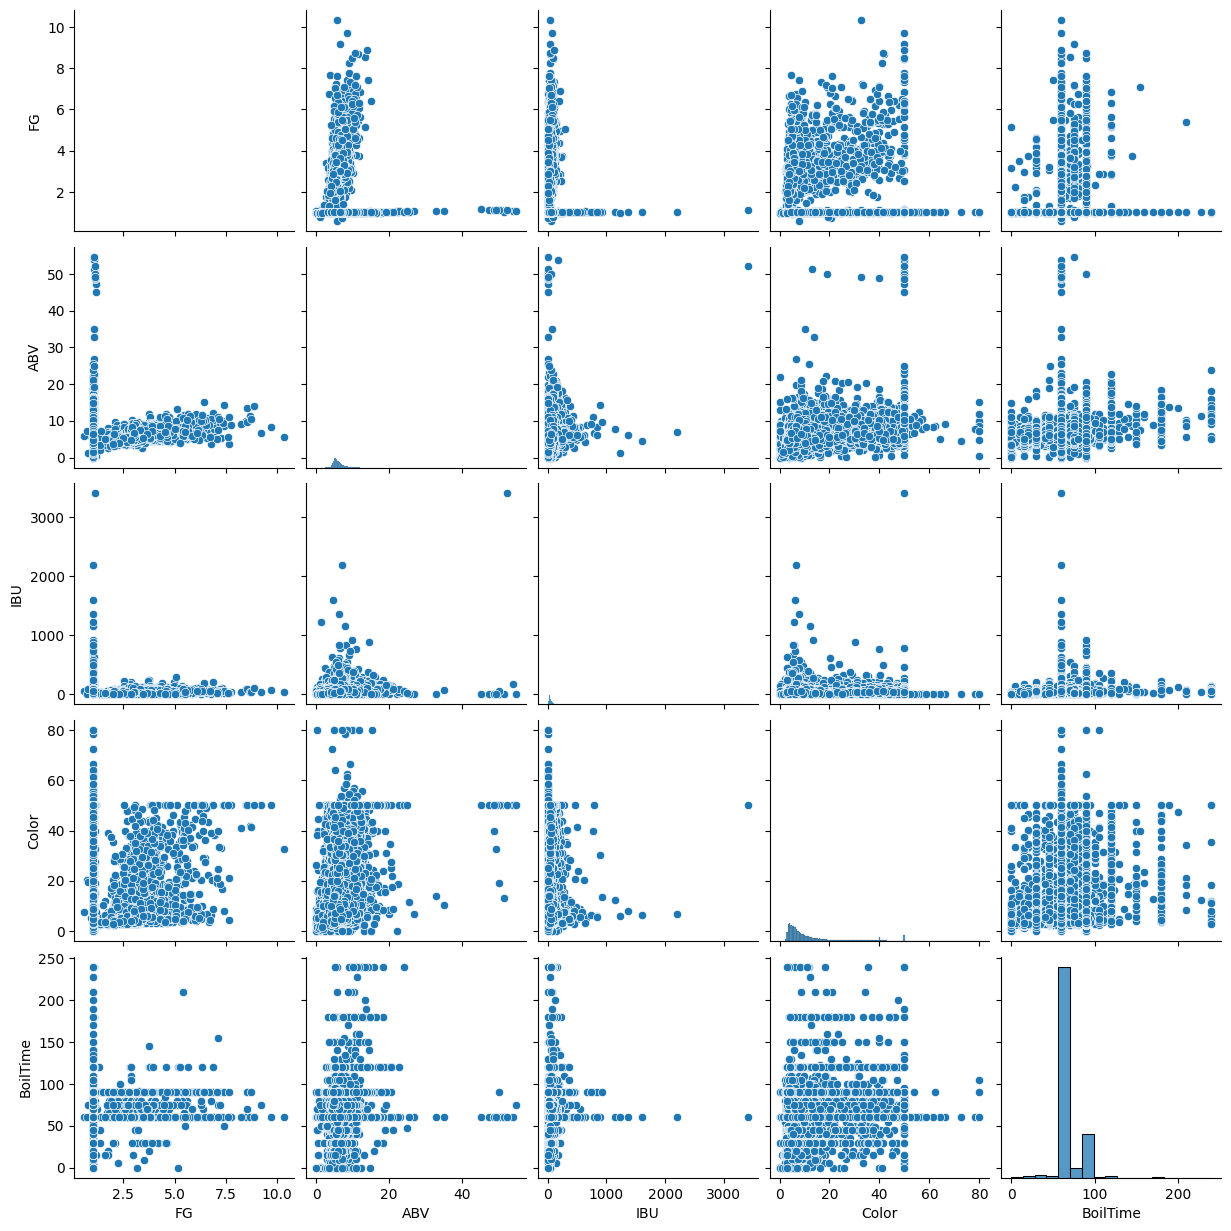

In [92]:
sns.pairplot(beer1[['FG', 'ABV', 'IBU', 'Color', 'BoilTime',
       'SugarScale', 'Simple_style']])